In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import requests
import json
from scipy.stats import linregress

In [2]:
# Load CSV Files into Dataframes
games_file = "data/games.csv"
atbats_file = "data/atbats.csv"
player_name_file = "data/player_names.csv"

games_pd = pd.read_csv(games_file)
atbats_pd = pd.read_csv(atbats_file)
player_name_pd = pd.read_csv(player_name_file)

games_atbats_merge_pd = pd.merge(games_pd, atbats_pd, how="left", on=["g_id"])

games_atbats_merge_pd.columns = ['Attendance',
                                 'Final Score',
                                 'Away Team',
                                 'Game Date',
                                 'Elapsed Time',
                                 'Game ID',
                                 'Home Team Score',
                                 'Home Team',
                                 'Game Start Time',
                                 'Umpire 1',
                                 'Umpire 2',
                                 'Umpire 3',
                                 'Umpire HP',
                                 'Venue',
                                 'Weather',
                                 'Wind',
                                 'Delay Time',
                                 'AtBat ID',
                                 'Player ID',
                                 'Event',
                                 'Inning',
                                 'Outs',
                                 'Score of Pitchers Team',
                                 'Pitcher Hand',
                                 'Pitcher ID',
                                 'Batter Stance',
                                 'Top of the Inning'
                                ]
games_atbats_merge_pd.drop(['Umpire 1', 'Umpire 2','Umpire 3','Umpire HP','Outs','Batter Stance'], inplace=True, axis=1, errors='ignore')
games_atbats_merge_pd.head()

,Attendance,Final Score,Away Team,Game Date,Elapsed Time,Game ID,Home Team Score,Home Team,Game Start Time,Venue,...,Wind,Delay Time,AtBat ID,Player ID,Event,Inning,Score of Pitchers Team,Pitcher Hand,Pitcher ID,Top of the Inning
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000001,572761,Groundout,1,0,L,452657,True
1,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000002,518792,Double,1,0,L,452657,True
2,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000003,407812,Single,1,0,L,452657,True
3,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000004,425509,Strikeout,1,0,L,452657,True
4,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000005,571431,Strikeout,1,0,L,452657,True


In [3]:

games_atbats_merge_pd.columns


Index(['Attendance', 'Final Score', 'Away Team', 'Game Date', 'Elapsed Time',
       'Game ID', 'Home Team Score', 'Home Team', 'Game Start Time', 'Venue',
       'Weather', 'Wind', 'Delay Time', 'AtBat ID', 'Player ID', 'Event',
       'Inning', 'Score of Pitchers Team', 'Pitcher Hand', 'Pitcher ID',
       'Top of the Inning'],
      dtype='object')

In [4]:
# Keala's Player Input Visualization

In [5]:
#Keala's Venue Visualization

In [6]:
#Scott's Weather Visualizations - Temp, Conditions, & Wind speed

In [7]:
#Kelsey's Time Visualizations - Day of the week, & Time of day

In [8]:
#Jorge's Stats Visualizations - Home scores/Record
### Get Home ABs
dfHomeAB  = games_atbats_merge_pd.loc[games_atbats_merge_pd['Top of the Inning'] == False, :] #Home ABs
dfHomeAB = dfHomeAB[['Game Date','Attendance','Event', 'Final Score', 'Away Team', 'Game ID', 'Home Team Score', 'Home Team', 'Venue']]
dfAwayAB  = games_atbats_merge_pd.loc[games_atbats_merge_pd['Top of the Inning'] == True, :] #Away Abs
dfAwayAB = dfAwayAB[['Game Date','Attendance','Event', 'Final Score', 'Away Team', 'Game ID', 'Home Team Score', 'Home Team', 'Venue']]
dfAwayAB.head()

#grpHome.count()


,Game Date,Attendance,Event,Final Score,Away Team,Game ID,Home Team Score,Home Team,Venue
0,2015-04-05,35055,Groundout,3,sln,201500001,0,chn,Wrigley Field
1,2015-04-05,35055,Double,3,sln,201500001,0,chn,Wrigley Field
2,2015-04-05,35055,Single,3,sln,201500001,0,chn,Wrigley Field
3,2015-04-05,35055,Strikeout,3,sln,201500001,0,chn,Wrigley Field
4,2015-04-05,35055,Strikeout,3,sln,201500001,0,chn,Wrigley Field


In [9]:
### Stadium Capacity
dictParkCapacity = {'Wrigley Field':41649, 
                    'Safeco Field':47715,  
                    'Marlins Park':36742,  
                    'Tropicana Field':25000, 
                    'Citizens Bank Park':43035,  
                    'Kauffman Stadium':37903,  
                    'Minute Maid Park':41168,  
                    'Miller Park':41900, 
                    'Comerica Park':41083,  
                    'Nationals Park':41339,  
                    'Great American Ball Park':42319, 
                    'Dodger Stadium':56000,  
                    'Chase Field':48686,  
                    'O.co Coliseum':47170,  
                    'Yankee Stadium':47309,  
                    'Petco Park':40209,  
                    'Coors Field':46897, 
                    'Progressive Field':35041, 
                    'Globe Life Park in Arlington':48114,  
                    'Angel Stadium of Anaheim':45477, 
                    'U.S. Cellular Field':40615,  
                    'Turner Field':49586,  
                    'Oriole Park at Camden Yards':45971, 
                    'AT&T Park':41915, 
                    'PNC Park':38747,  
                    'Target Field':38649,  
                    'Busch Stadium':45494,  
                    'Citi Field':41922, 
                    'Rogers Centre':49282,  
                    'Fenway Park':37755,  
                    'Oakland Coliseum':47170,  
                    'Fort Bragg Field':12500, 
                    'Guaranteed Rate Field':40615,  
                    'SunTrust Park':41084, 
                    'Williamsport Little League Classic':2596,  
                    'Hiram Bithorn Stadium':18264, 
                    'Estadio de Beisbol Monterrey':22061,  
                    'Angel Stadium':45477,  
                    'BB&T Ballpark':10200}

In [10]:
grpHome = dfHomeAB.groupby('Game ID')
#### Merge single home game rows 
gDate = grpHome['Game Date'].max()
gHomeAttend = grpHome['Attendance'].mean()
gAwayScore = grpHome['Final Score'].mean()
gHomeScore = grpHome['Home Team Score'].mean()
gHomeTeam = grpHome['Home Team'].max() 
gVenue = grpHome['Venue'].max() 
#### Create home game stats DF
pdHomeStats = pd.DataFrame({"Attendance":gHomeAttend,"Date":gDate,"Away Score":gAwayScore,"Home Score":gHomeScore,"Team":gHomeTeam,"Venue":gVenue})
pdHomeStats['Game Result'] = np.where(pdHomeStats['Home Score'] > pdHomeStats['Away Score'], 'W','L')
pdHomeStats['Percent Capacity'] = "" 
pdHomeStats['Year'] = ""
pdHomeStats['Month'] = ""
for index, row in pdHomeStats.iterrows():
    gameAtt = row['Attendance']
    parkCap = dictParkCapacity[row['Venue']]
    pdHomeStats.loc[index,'Percent Capacity'] = float(gameAtt/parkCap)
    gameDate = row['Date'].split('-')
    pdHomeStats.loc[index,'Year'] = gameDate[0]
    pdHomeStats.loc[index,'Month'] = gameDate[1]
pdHomeStats.head()

,Attendance,Date,Away Score,Home Score,Team,Venue,Game Result,Percent Capacity,Year,Month
Game ID,,,,,,,,,,
201500001,35055,2015-04-05,3,0,chn,Wrigley Field,L,0.841677,2015,04
201500002,45909,2015-04-06,1,4,sea,Safeco Field,W,0.96215,2015,04
201500003,36969,2015-04-06,2,1,mia,Marlins Park,L,1.00618,2015,04
201500004,31042,2015-04-06,6,2,tba,Tropicana Field,L,1.24168,2015,04
201500005,45549,2015-04-06,8,0,phi,Citizens Bank Park,L,1.05842,2015,04


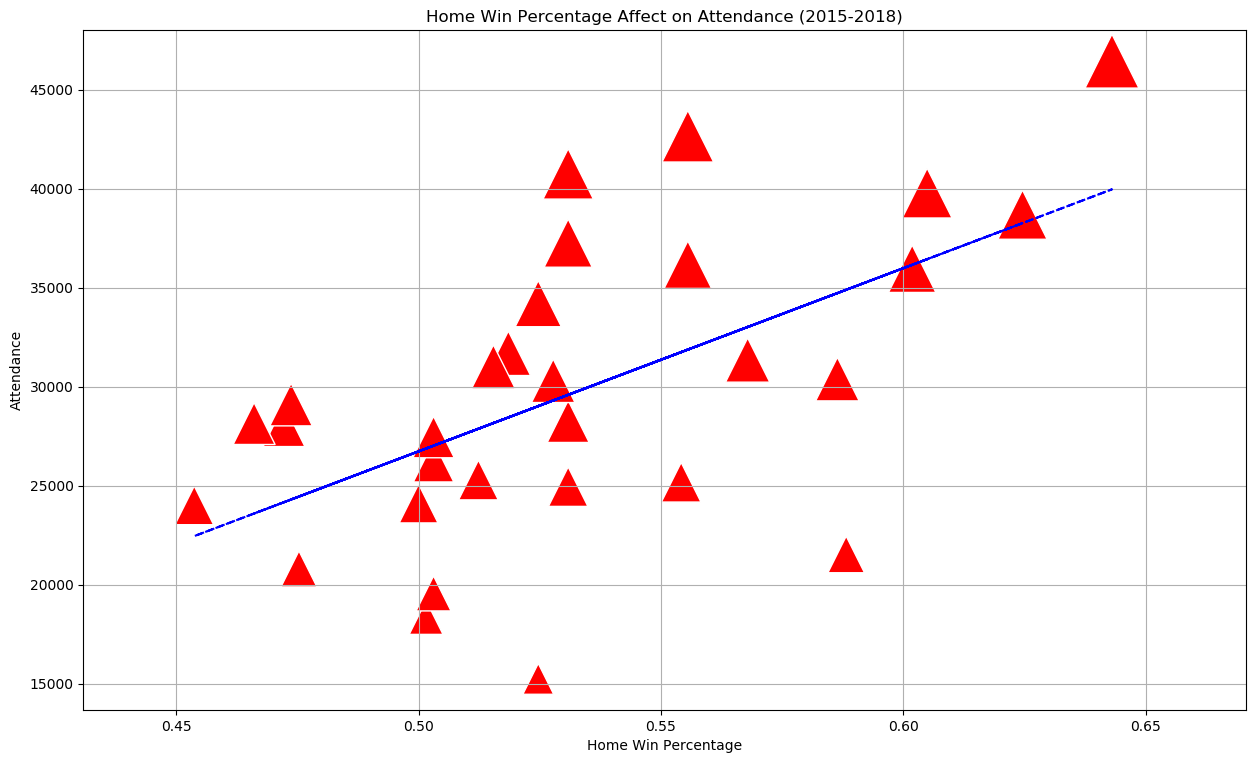

In [23]:
teamStats = pdHomeStats.groupby(['Team'])
teamAttendTotal = teamStats['Attendance'].sum()/10000
teamAttendPer = teamStats['Attendance'].mean()
teamWinPercent = teamStats['Game Result'].value_counts(normalize=True,sort=False).unstack().reset_index()['W']
plt.figure(figsize=(15,9), dpi=100)
plt.scatter(x=teamWinPercent,y=teamAttendPer,marker="^", c='#FF0000', edgecolors='#FFFFFF',s=teamAttendTotal)
# Set line
(slope, intercept, _, _, _) = linregress(teamWinPercent, teamAttendPer)
fit = slope * teamWinPercent + intercept
plt.plot(teamWinPercent, fit, 'b--')
plt.grid()
plt.title("Home Win Percentage Affect on Attendance (2015-2018)")
plt.xlabel("Home Win Percentage")
plt.ylabel("Attendance")
plt.savefig("Home Wins Affect on Attendance.png")

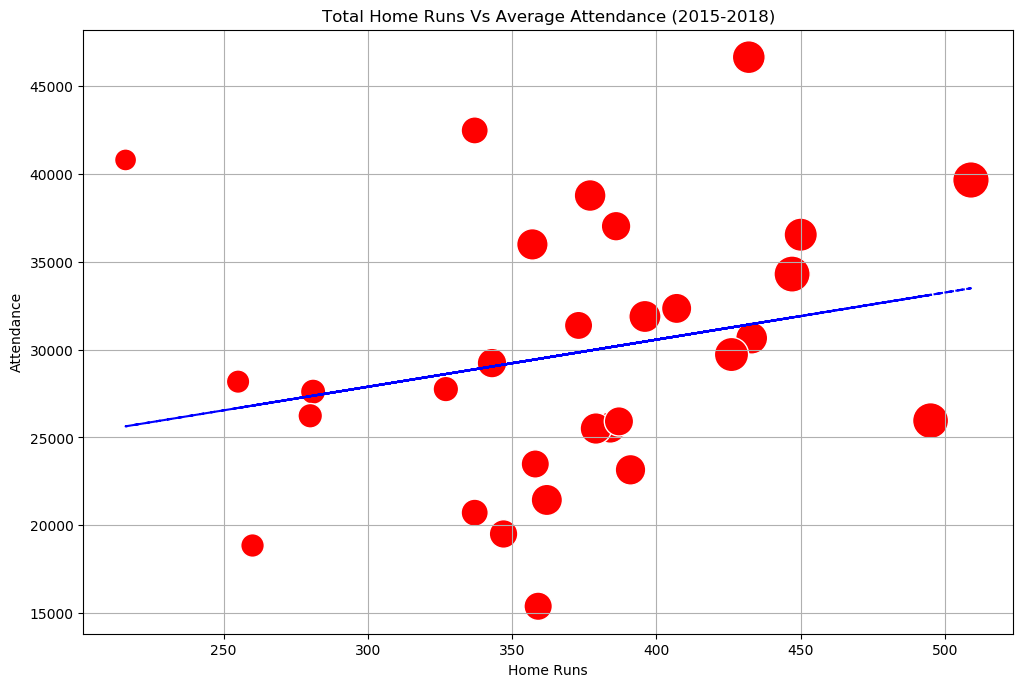

In [26]:
#Jorge's Stat Visualizations - Average Homeruns at home vs Attendance
homeRuns = dfHomeAB.loc[dfHomeAB['Event']=="Home Run",:]
homeRuns['Event'].sum()
teamHomeRuns = homeRuns.groupby(['Home Team'])
teamHRCount = teamHomeRuns['Event'].count()
totalAttendance = teamHomeRuns['Attendance'].mean()
totalRunsScored = teamHomeRuns['Home Team Score'].sum()*.2
plt.figure(figsize=(12,8), dpi=100)
plt.scatter(x=teamHRCount,y=totalAttendance,c='red', edgecolors='white',s=totalRunsScored)
(slope, intercept, _, _, _) = linregress(teamHRCount, totalAttendance)
fit = slope * teamHRCount + intercept
plt.plot(teamHRCount, fit, 'b--')
plt.grid()
plt.title("Total Home Runs Vs Average Attendance (2015-2018)")
plt.xlabel("Home Runs")
plt.ylabel("Attendance")
plt.savefig("Total Home Runs Vs Average Attendance.png")

In [ ]:
#Kelsey's Home Team vs Visiting team Visualization

In [ ]:
#Keala's League Visualization - National vs American